1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


(array([0.00947255, 0.00947255, 0.02841764, 0.02841764, 0.05683527,
        0.03789018, 0.08525291, 0.05683527, 0.1894509 , 0.19892345,
        0.26523127, 0.35995672, 0.33153908, 0.35048417, 0.37890181,
        0.38837435, 0.36942926, 0.32206654, 0.2936489 , 0.25575872,
        0.20839599, 0.13261563, 0.104198  , 0.11367054, 0.04736273,
        0.05683527, 0.04736273, 0.        , 0.        , 0.00947255]),
 array([-3.14559089, -2.93445439, -2.7233179 , -2.5121814 , -2.30104491,
        -2.08990841, -1.87877191, -1.66763542, -1.45649892, -1.24536243,
        -1.03422593, -0.82308943, -0.61195294, -0.40081644, -0.18967995,
         0.02145655,  0.23259305,  0.44372954,  0.65486604,  0.86600253,
         1.07713903,  1.28827552,  1.49941202,  1.71054852,  1.92168501,
         2.13282151,  2.343958  ,  2.5550945 ,  2.766231  ,  2.97736749,
         3.18850399]),
 <BarContainer object of 30 artists>)

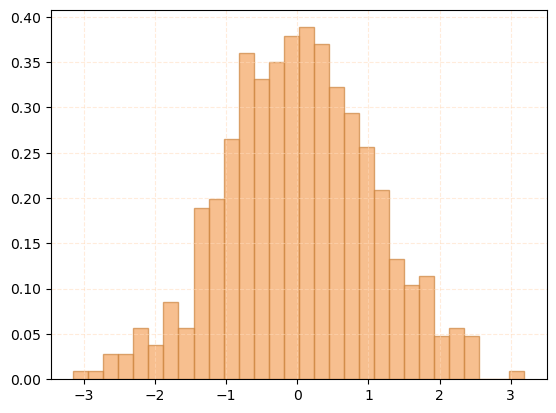

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
array= np.random.normal(0,1,500)
plt.grid(linestyle='--', color='peachpuff', zorder=-1, alpha=0.5)
plt.hist(array, bins=30, density=True, edgecolor='peru', color='sandybrown', alpha=0.7 )


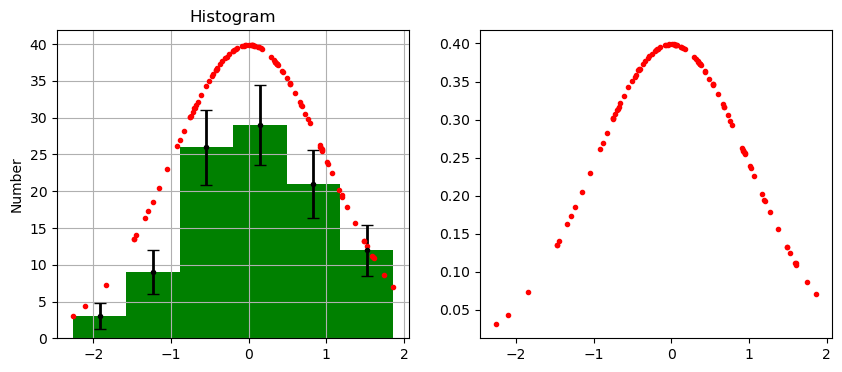

95.78997957990597
63.5787504947175
None


In [26]:
#1  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
N = 100 #size of the data set
x = np.random.normal(size=N)#np.random.normal(loc=mean,scale=std_dev,size=int/tuple of ints)
#print(x,type(x))  #100 numbers whose mean is 0 and std. dev is 1
#k = int(np.log2(N)+1)  #if used np.ceil() returns the higher rounded integer value #No. of bins, Sturges formula which assumes Normal distribution an alternative to square root rule 
#k=int(np.sqrt(N))
#print(N,k)
k = 6
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10, 4));

n, binEdges, patches = ax1.hist(x, bins=k, facecolor='g');
ax1.yaxis.set_major_locator(MaxNLocator(integer=True));
ax1.set_ylabel('Number');
ax1.set_title('Histogram');
ax1.grid(True);
#print(n)
#print(bins)
#print(np.array(patches)[0])
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
Std = np.sqrt(n)   #error being poisson uncertainity
ax1.errorbar(bincenters, n, yerr=Std,fmt='.k',elinewidth=2,capsize=4 ); 
ax1.plot(x, N*norm.pdf(x),'r.', label='norm pdf')#Each y axis value is multipled by N, where we are scaling it
ax2.plot(x, norm.pdf(x),'r.', label='norm pdf')
plt.show()
# ----------------------------------------------------------------
#x_gauss = np.linspace(min(x),max(x),200)
#Gauss_integral = np.trapz(norm.pdf(x_gauss)*N,x_gauss)
#print(Gauss_integral)

#The main factor that helps in matching the histogram with the gaussian curve is the k=number of bins.

I = np.trapz(norm.pdf(np.sort(x))*N,np.sort(x))#we need to sort it in ascending order since we are taking an integral from low to higher x value
print(I)#ALso, we need to multiply by norm.pdf(x) by N=cardinality / no. of elements of dataset x. By, doing so we can scaleit in proper way.
#correct
binwidth = abs(binEdges[0]-binEdges[-1])/k
hist_integral = np.trapz(y=n,dx=binwidth)
print(hist_integral)
#print(n)
#print(binwidth)
#print(sum(n*binwidth))summation over n multiplied by x or dx
print(x.sort())

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

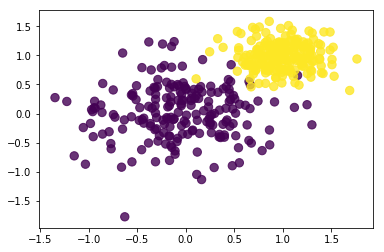

In [27]:

from IPython.display import Image
Image('two_categories_scatter_plot.png')

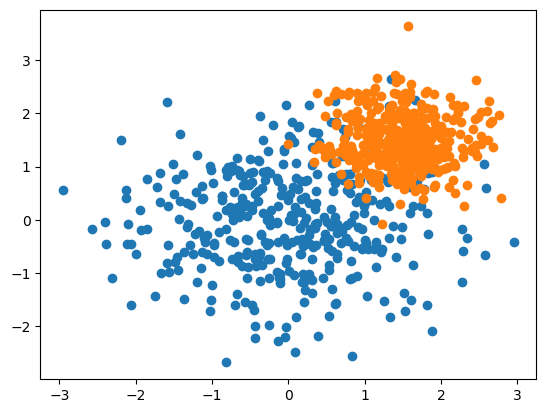

In [28]:
n = 2   # dimesionality of the data points
N = 400  # number of data points generated for each set
x = np.random.normal(loc=0.0, scale=1, size=(N,2))  # creazione di un set di random data points with normal distribution. Loc set the mean of distribution at 0.0, 'scale' set the standard deviation at 1.0, 'N', shape of array
y = np.random.normal(loc=1.5, scale=0.5, size=(N,2))
#no need to choose the colors for plotting on top of each other because python itself can differentiate
#for i in range(n):
plt.scatter(x[:,0],x[:,1],marker='o')  # satter prlot con prima e seconda variabile
plt.scatter(y[:,0],y[:,1],marker='o')

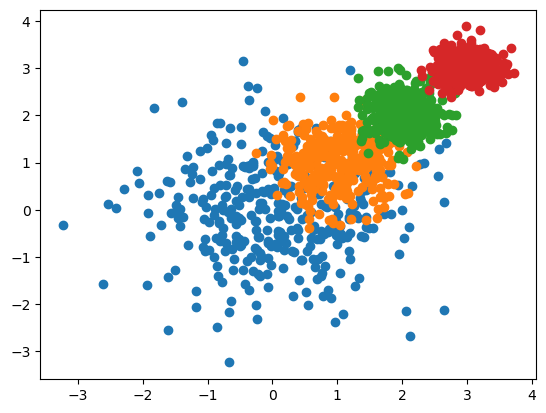

In [29]:
#Generalizing it to n categories
def Gaussian2d(n,N):#scale or std=0.5 for all and mean in steps of 1
    for i in range(n):#n is number of categories
        x=np.random.normal(loc=1*i, scale=1/(i+1), size=(N,2))#just changing the values of mean and std dev
        plt.scatter(x[:,0],x[:,1])
Gaussian2d(4,350)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [30]:

import pandas as pd
import numpy as np
M = np.load("residuals_261.npy",allow_pickle=True ).item()
#print(M)
df = pd.DataFrame(M)
df.head()


,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

In [31]:
dfnew = df[np.absolute(df["residuals"])>=2]#all the values of residuals less than 2 are named as False and thus not included in dataframe
dfnew = dfnew.reset_index(drop=True)
dfnew.head()

,residuals,distances
0,-7.20,3.4
1,-4.15,8.4
2,-6.59,1.7
3,-11.02,4.4
4,-2.27,0.6


* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()`

In [32]:
from scipy.stats import linregress
x = dfnew['residuals']
y = dfnew['distances']
slope, intercept, rval, pval, stderr = linregress(x,y)
print("Slope:",slope)
print("Intercept:",intercept)
print("r_value:",rval)
print("p_value:",pval)
print("Standard err of gradient estimate:",stderr)

Slope: -0.015328761942782154
Intercept: 6.64243894875118
r_value: -0.041647413481706204
p_value: 0.29204264792592827
Standard err of gradient estimate: 0.014536240092889547


* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot

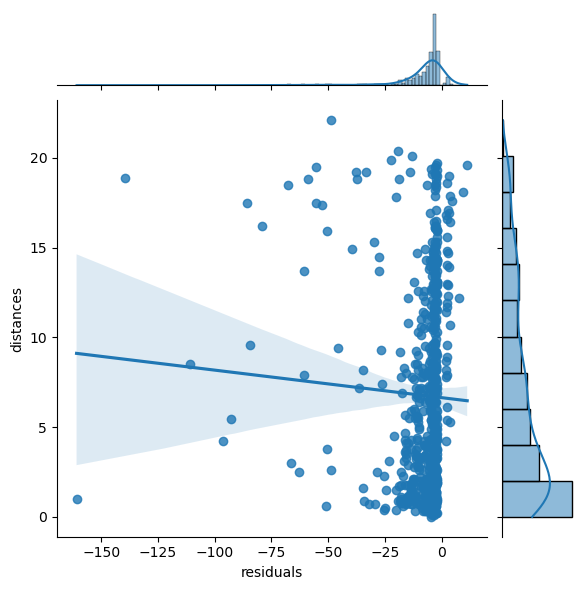

In [34]:
import seaborn as sns
g = sns.jointplot(x="residuals", y="distances", data=dfnew, kind="reg");

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"

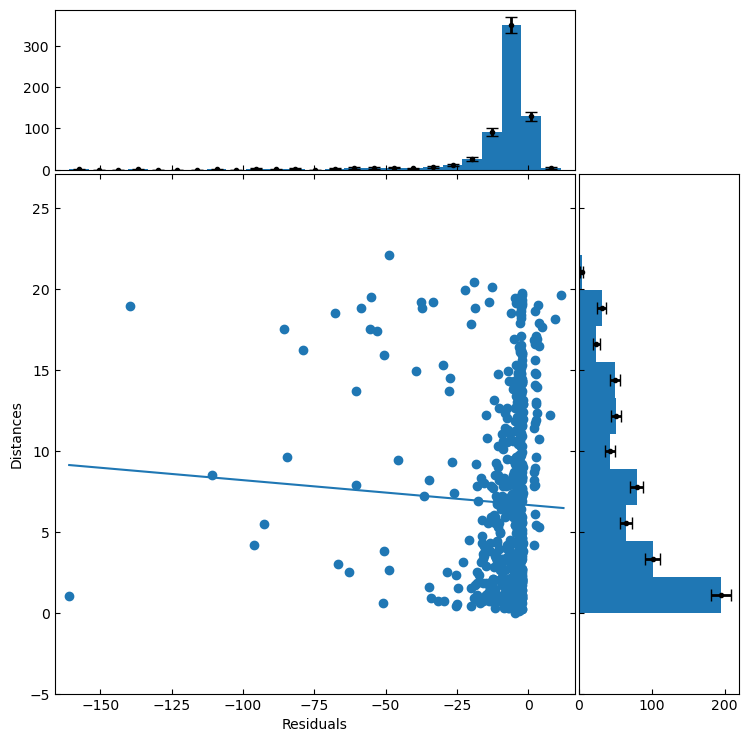

In [35]:
from scipy.stats import linregress
from scipy.stats import norm

x = dfnew['residuals']
y = dfnew['distances']

#performing linear regression using scipy.stats
slope, intercept, rval, pval, stderr = linregress(x,y)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8,8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

#calculating the rough number of bins required for histogram plot
binx=int(np.sqrt(len(x)))
biny=int(np.sqrt(len(y)))

#setting the limits of scatter plot
ax_scatter.set_xlim((min(x)-5, max(x)+5))
ax_scatter.set_ylim((min(y)-5, max(y)+5))
ax_scatter.set_xlabel("Residuals")
ax_scatter.set_ylabel("Distances")

#simply calculating the length of each bin or binwidth for pleasure
x_endpoints = ax_scatter.get_xlim()
binwidth_x = abs(x_endpoints[1]-x_endpoints[0])/binx
y_endpoints = ax_scatter.get_ylim()
binwidth_y = abs(y_endpoints[1]-y_endpoints[0])/biny

#binslist_X = np.arange(-x_endpoints[0], x_endpoints[1] + binwidth_x, binwidth_x)
#binslist_Y = np.arange(-y_endpoints[0], y_endpoints[1] + binwidth_y, binwidth_y)

#plotting histogram
NBins_x = 25
nx, binEdges_x, patches_x = ax_histx.hist(x, bins=NBins_x)#instead of binx/biny, i have used different number of bins instead.
NBins_y = 10
ny, binEdges_y, patches_y = ax_histy.hist(y, bins=NBins_y, orientation='horizontal')
#plotting error bar on top of histogram
bincenters_x = 0.5*(binEdges_x[1:]+binEdges_x[:-1])#formula to calculate bin center
Std_x = np.sqrt(nx)#error being poisson uncertainity
ax_histx.errorbar(bincenters_x, nx,yerr=Std_x,fmt='.k',elinewidth=2,capsize=4 ); 

bincenters_y = 0.5*(binEdges_y[1:]+binEdges_y[:-1])
Std_y = np.sqrt(ny)#error being poisson uncertainity
#I have just shifted x to y and y to x to get a horizontal error bar and instead wrote xerr instead of yerr to suit my requirements,Boo
ax_histy.errorbar(ny, bincenters_y, xerr=Std_y,fmt='.k',elinewidth=2,capsize=4); 

#setting the limits of histx(top histogram) and histy(left histogram) 
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

#Plotting regression line using y=mx+c formula
X = np.linspace(min(x),max(x)+1,100)
Y = (slope*X) + intercept
ax_scatter.plot(X,Y)

plt.show()

#I have not used seaborn to plot a frequency plot histogram with a curve on top because it is poor programming since in this exercise we are not supposed to use sns. 
#Using sns to create a curve on histogram(where we are not supposed to use seaborn) for completing this task is a poor choice.